# Fill Null data for Age

In [3]:
## Import modules

In [74]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#ignore warnings
import warnings

%matplotlib inline

Import file(Should put 'r' in front to avoid SyntaxError)

In [76]:
df_train=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\train.csv')
df_test=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\test.csv')

Create 'FamilySize' column

In [78]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1
#Why do I put 1? 'Because Sibsp, Parch does not include the passenger himself. SibSp' refers the number of sibling+spouse the passenger aboarded wih.'SibSp' refers the number of parents and chold the passenger aboarded wih


In [84]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
print(df_test['Fare'].mean())

2.947867689314118


Fill the Fare data with not skewed data

In [86]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
#use of 'lambda' to log the outliers

## Fill null data

How many null data in 'Age'?

In [88]:
df_train['Age'].isnull().sum()

177

There is 177 null data for age. 

Use titles (Mr, Mrs, Miss, others) to group data to fill out null data

Extract all the titles and make them into string format.

'([A-Za-z]+)\.'= extract keywords that start with A to Z, a to z; and ends with the dot

In [128]:
df_train['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [129]:
df_train['Title']=df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Title']=df_test['Name'].str.extract('([A-Za-z]+)\.')

See the title distribution

In [130]:
pd.crosstab(df_train['Title'], df_train['Sex']).T.style.background_gradient()

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [131]:
pd.crosstab(df_test['Title'], df_test['Sex']).T.style.background_gradient()

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


Replace various titles to (Mr, Mrs, Miss, others, Master)

In [132]:
df_train['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                         ['Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Other', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr'], inplace=True)
df_test['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'Dona'],
                         ['Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Other', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs'], inplace=True)

In [133]:
df_train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Title,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,0.162256,4.675000
Miss,412.518717,0.705882,2.278075,22.033113,0.700535,0.534759,0.039771,2.235294
Mr,457.016760,0.162011,2.372439,33.010791,0.290503,0.150838,-0.079958,1.441341
Mrs,455.595238,0.793651,1.992063,35.871560,0.690476,0.825397,0.167692,2.515873
Other,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000,1.000000


What gender survived most?

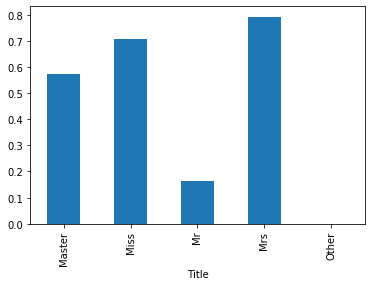

In [120]:
df_train.groupby('Title')['Survived'].mean().plot.bar()

Mr showed lowest survival rate while Mrs showed highest sruvival rates

Combine test, train datasets.

In [134]:
df_all=pd.concat([df_train, df_test])

In [135]:
df_all.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Title,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,0.109504,4.426230
Miss,616.766917,0.705882,2.327068,21.956233,0.654135,0.492481,0.018656,2.146617
Mr,658.726343,0.162011,2.350384,32.802479,0.286445,0.159847,-0.075081,1.446292
Mrs,689.437186,0.793651,1.929648,36.982558,0.653266,0.824121,0.174668,2.477387
Other,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000,1.000000


In [146]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

Put mean age data to the null data

In [152]:
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Mr'), 'Age']=33
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Mrs'), 'Age']=37
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Master'), 'Age']=5
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Miss'), 'Age']=22
df_train.loc[(df_train['Age'].isnull())&(df_train['Title']=='Other'), 'Age']=45

Put mean age data to the null data for test datasets

In [153]:
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Mr'), 'Age']=33
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Mrs'), 'Age']=37
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Master'), 'Age']=5
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Miss'), 'Age']=22
df_test.loc[(df_test['Age'].isnull())&(df_test['Title']=='Other'), 'Age']=45

In [156]:
df_train['Age'].isnull().sum()

0

There is no null data for train dataset

In [157]:
df_test['Age'].isnull().sum()

0

There is no null data for test dataset

## Embarked-Survival analysis

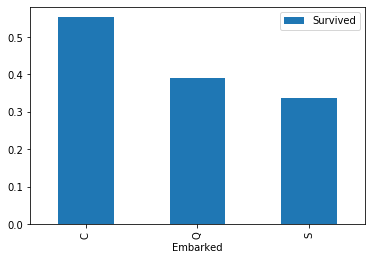

Passengers from C port is most likely to have survived. Why?

Text(0.5, 1.0, 'Relationship between Embarked-Pclass')

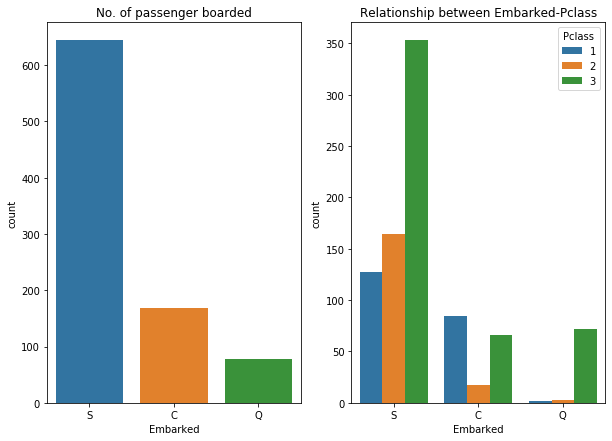

In [44]:
f, ax=plt.subplots(1, 2, figsize=(10, 7))
sns.countplot('Embarked', data=df_train, ax=ax[0])
ax[0].set_title('No. of passenger boarded')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1])
ax[1].set_title('Relationship between Embarked-Pclass')


Clearly, most 3rd class people boarded at the port S while seemingly no people boarded at port Q; therefore, the number of survival rate is hgher in Q while low in S. 

## Family number-Survival analysis

Combine SibSp, Parch into one dataset to make up a Family dataset.

In [58]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
#Why do I put 1? 'Because Sibsp, Parch does not include the passenger himself. SibSp' refers the number of sibling+spouse the passenger aboarded wih.'SibSp' refers the number of parents and chold the passenger aboarded wih

In [57]:
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

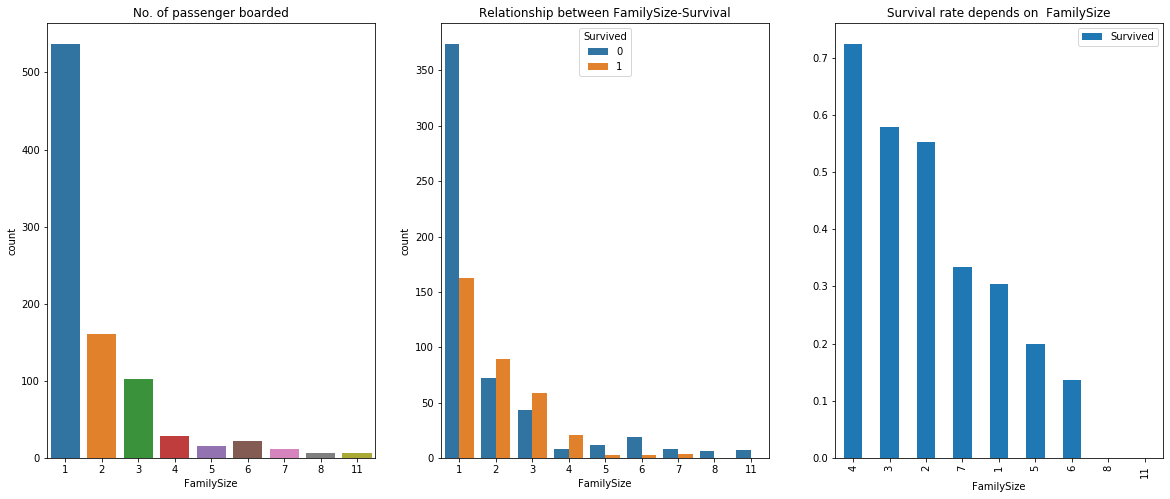

In [68]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('No. of passenger boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Relationship between FamilySize-Survival')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False). plot.bar(ax=ax[2])
ax[2].set_title('Survival rate depends on  FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

Passengers with 2-4 companies showed highest chance of survival while no family(1), or having too many companies(over 4) shows lower chance of survival.

## Fare

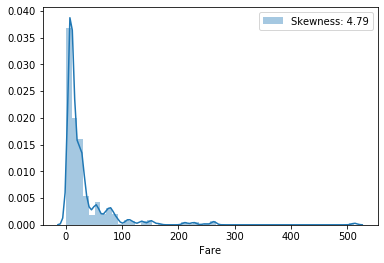

In [70]:
f, ax=plt.subplots(1,1)
g=sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

The grpah is right-skewed(positively skewed) that cannot be used to teach the model.
Therefore, to reduce the effect of outliers, should use log to make the grpah not skewed.

In [72]:
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
#use of 'lambda' to log the outliers

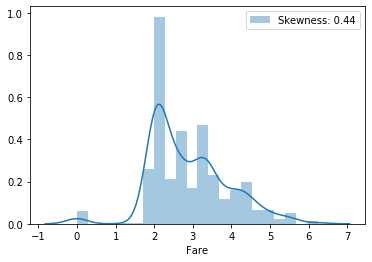

In [73]:
f, ax=plt.subplots(1,1)
g=sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')